<a href="https://colab.research.google.com/github/ezio341/PCVK_Genap_20-21/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import matplotlib.pyplot as plt
import math

Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


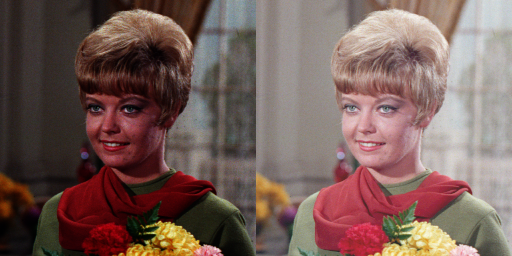

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

image = cv.imread('/content/drive/MyDrive/Assets/female.tiff')
gamma_img = np.zeros(image.shape, image.dtype)

for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
      correction = 255*((image[x,y,z]/255)**(1/gamma))
      gamma_img[x,y,z] = np.clip(correction, 0, 255)

frame = cv.hconcat((image, gamma_img))
cv2_imshow(frame)


Bit depth

 Bit Depth: 
----------------------------------
Masukkan nilai Depth: 3


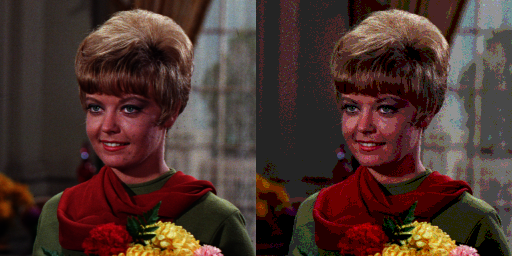

In [48]:
print(' Bit Depth: ')
print('----------------------------------')
try: 
 depth = int(input('Masukkan nilai Depth: '))
except ValueError:
 print('Error, not a number')

image = cv.imread('/content/drive/MyDrive/Assets/female.tiff')
depth_img = np.zeros(image.shape, image.dtype)

level = 255/((2**depth)-1)

for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
      correction = round((image[x,y,z]/level))*level
      depth_img[x,y,z] = np.clip(correction, 0, 255)

frame = cv.hconcat((image, depth_img))
cv2_imshow(frame)

Average Denoising

PSNR value:  20.18151664466341


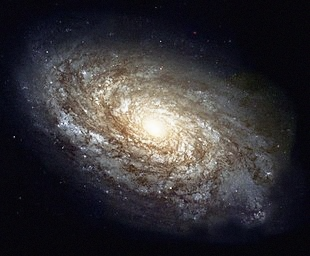

In [132]:
imageformat=".jpg"
path="/content/drive/MyDrive/Assets/noises/*.jpg"
files=glob.glob(path)
files.sort()

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

def avrg_func(n):
    temp = cv.imread(files[0])
    sum_arr = np.zeros(temp.shape).astype(np.float)
    for file in files[0:n]:
        img = cv.imread(file).astype(float)
        sum_arr = sum_arr + img
    denoised_img = sum_arr / n
    output = cv.normalize(denoised_img, None, 0, 255, cv.NORM_MINMAX)
    print('PSNR value: ',PSNR(temp, output))
    cv2_imshow(output)

avrg_func(100)


Masking

image input


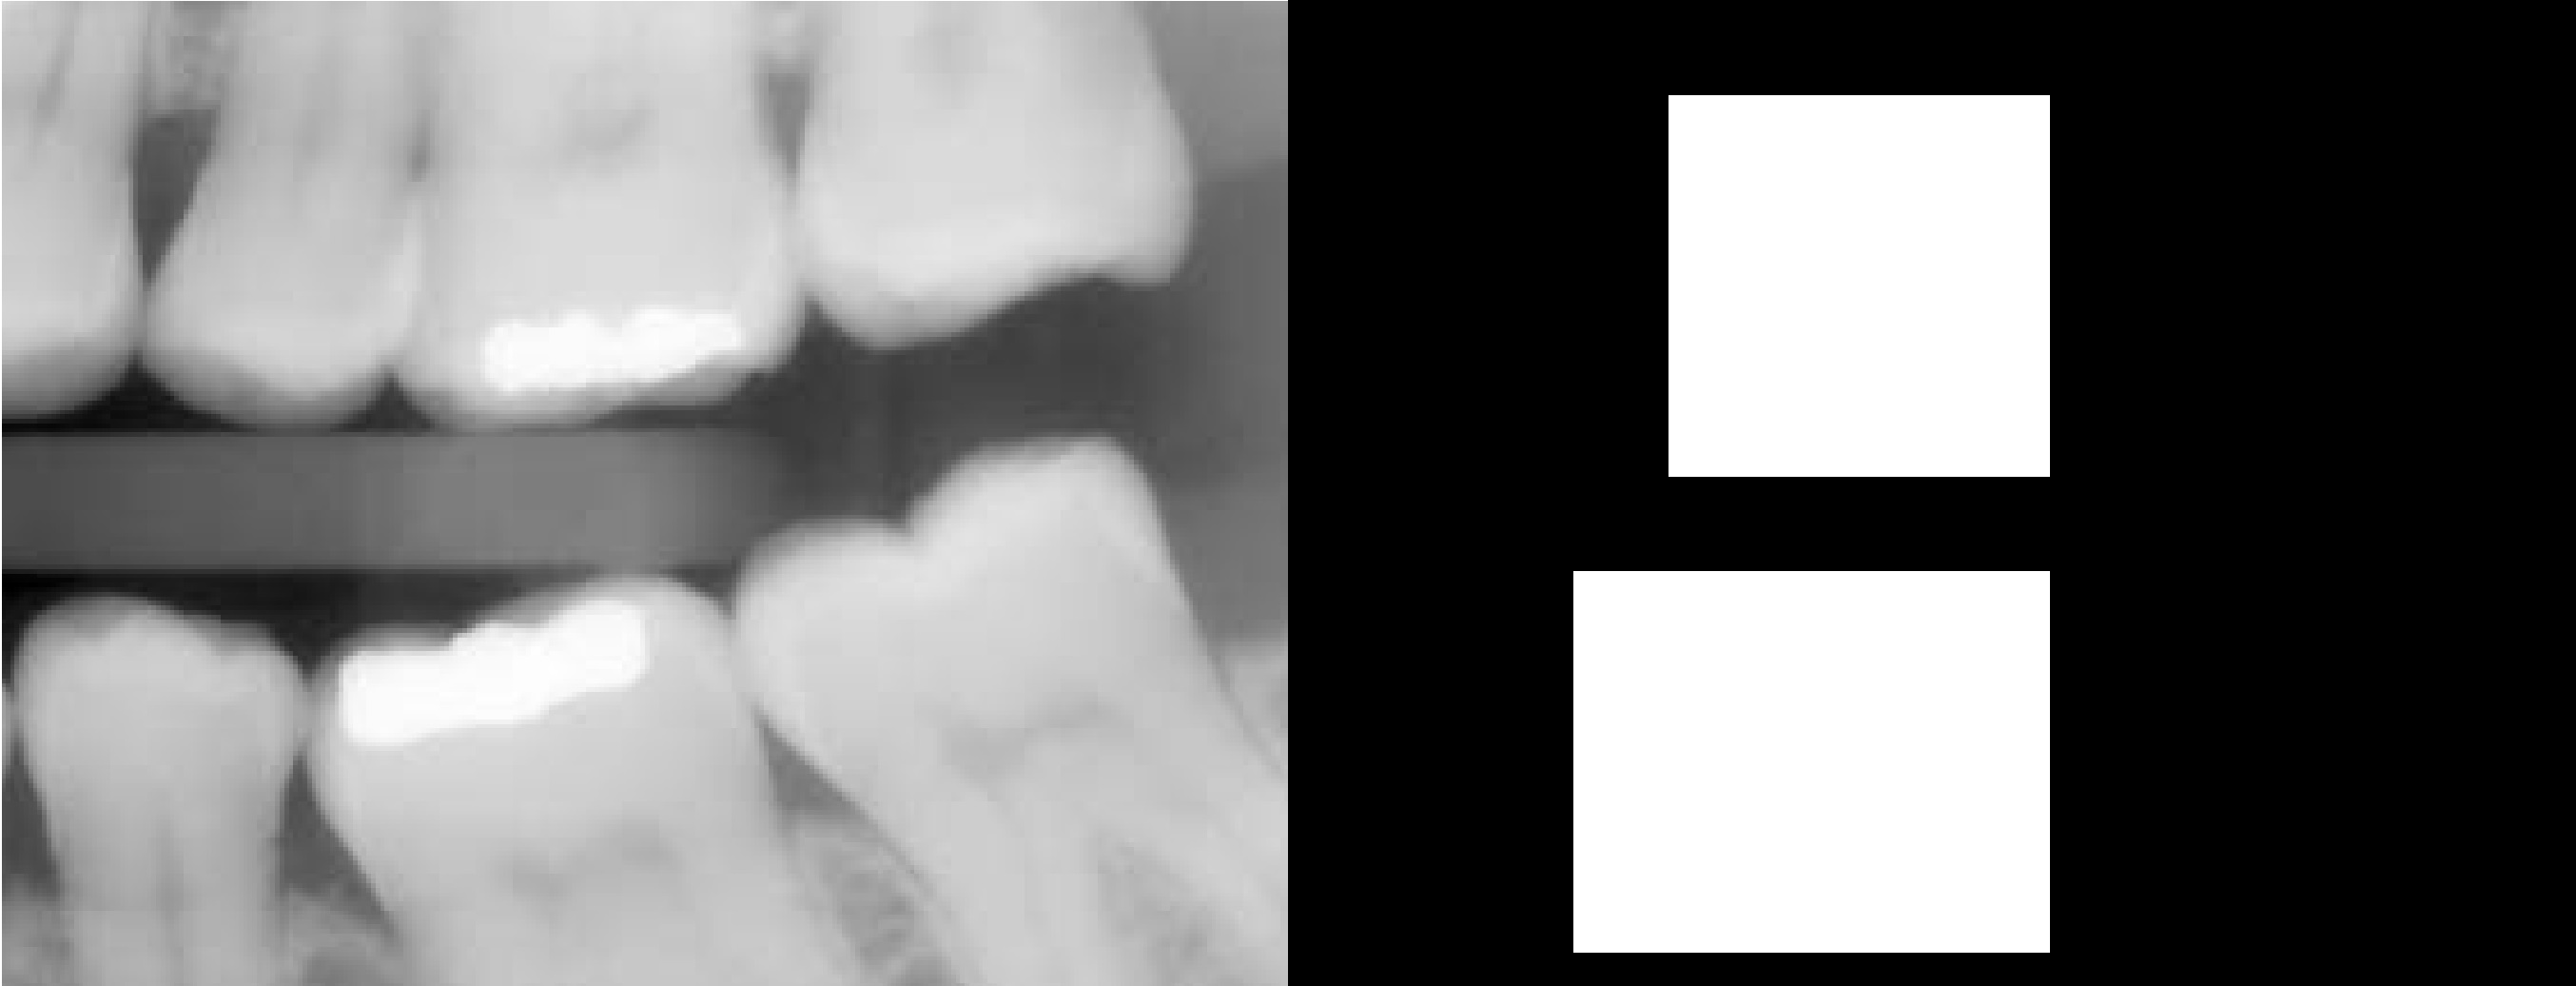

image output:


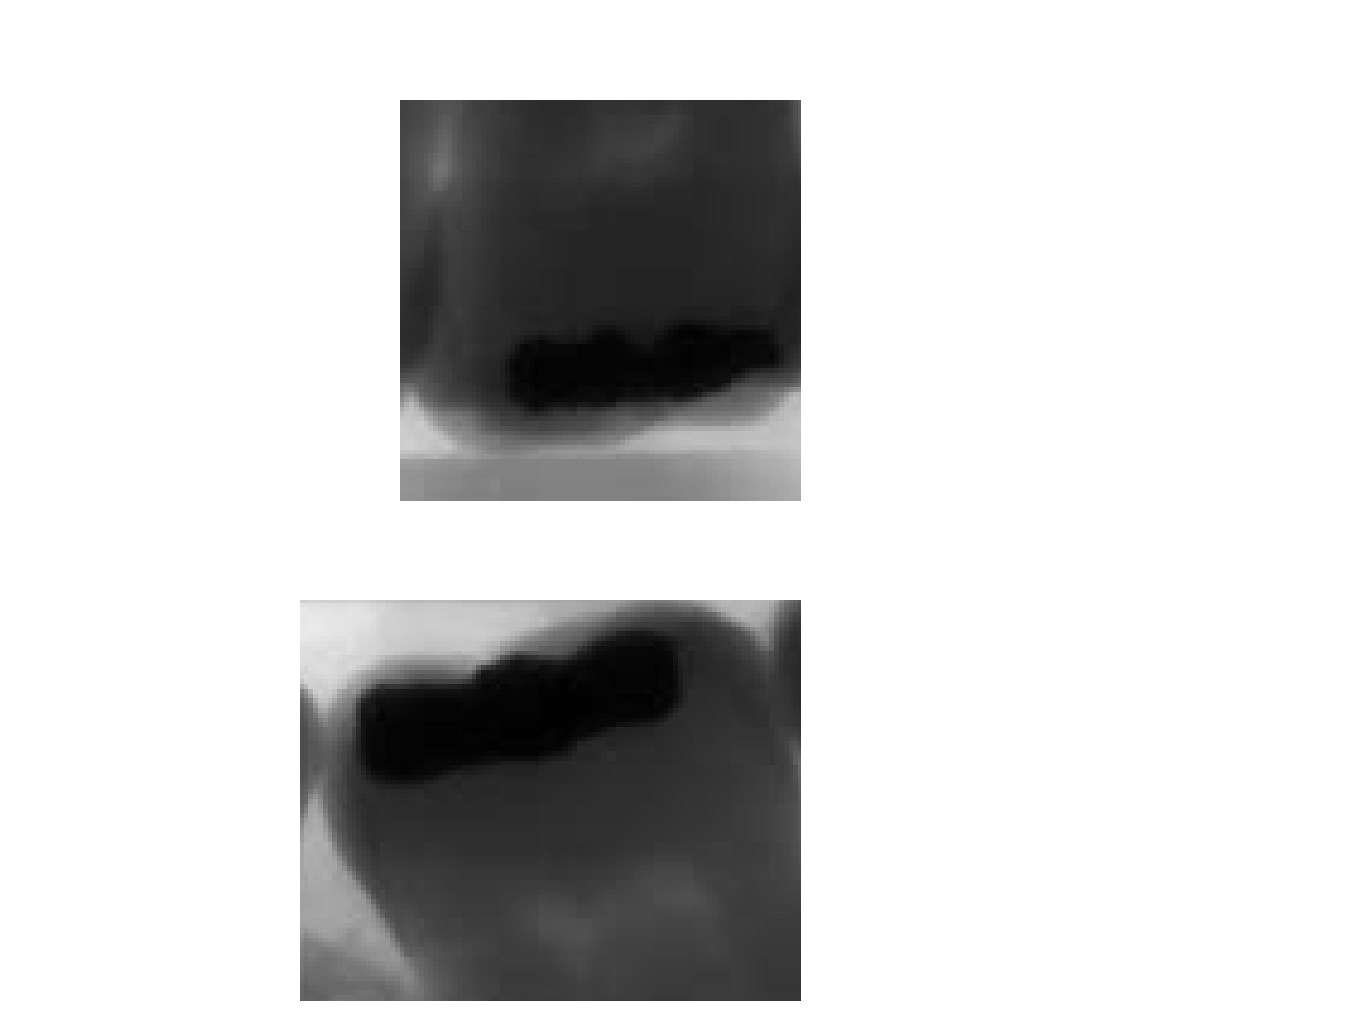

In [88]:
image = cv.imread('/content/drive/MyDrive/Assets/teeth.jpg')

black = np.zeros(image.shape, image.dtype)
mask = cv.rectangle(black, (400, 100), (800,500), [255,255,255], cv.FILLED)
mask = cv.rectangle(mask, (300, 600), (800,1000), [255,255,255], cv.FILLED)

print('image input')
frame = cv.hconcat((image, mask))
cv2_imshow(frame)

print('image output:')
# masked_img = cv.bitwise_and(image, mask)
# cv2_imshow(masked_img)
# masked_img = cv.bitwise_or(image, mask)
# cv2_imshow(masked_img)
# masked_img = cv.bitwise_not(image, mask)
# cv2_imshow(masked_img)
masked_img = cv.bitwise_not(cv.bitwise_and(image, mask))
cv2_imshow(masked_img)
# masked_img = cv.bitwise_xor(image, mask)
# cv2_imshow(masked_img)